In [4]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras import layers, metrics, datasets
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

np.random.seed(32)
tf.random.set_seed(32)
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data() # Changed x_val, y_val to x_val, y_val
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_val",x_val.shape) # Changed x_val to x_val
print("y_val",y_val.shape) # Changed y_val to y_val

x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_val (10000, 32, 32, 3)
y_val (10000, 1)


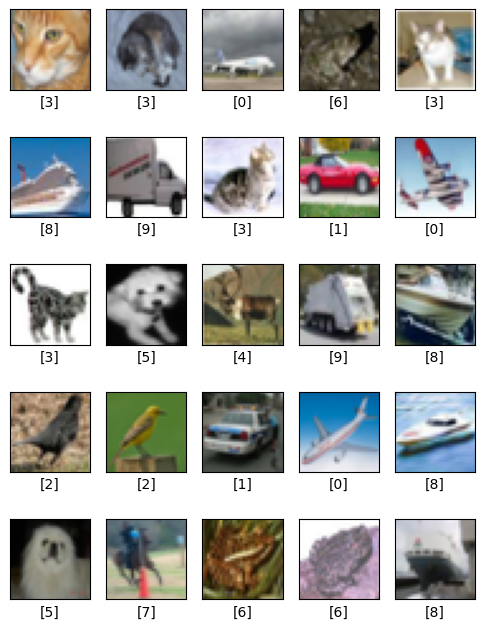

In [5]:
def show_random_images(images, labels, number_examples=25,figsize=(6,8)):
    indices = np.random.choice(len(images), number_examples,replace=False)
    plt.figure(figsize=figsize)
    for i,idx in enumerate(indices):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx],cmap="gray")
        plt.xlabel(labels[idx])
    plt.show()
show_random_images(x_train,y_train)

In [6]:
x_train,x_val=x_train/255.0,x_val/255.0
###
def prepare_dataset(x_train,x_val,y_train,y_val,batch_size=None):
    if batch_size is None:
        batch_size=len(x_train)
    train_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train))
    train_dataset=train_dataset.shuffle(buffer_size=len(x_train)).batch(batch_size)
    val_dataset=tf.data.Dataset.from_tensor_slices((x_val,y_val))
    val_dataset=val_dataset.batch(batch_size)
    return train_dataset,val_dataset

In [7]:
train_ds,val_ds=prepare_dataset(x_train,x_val,y_train,y_val,batch_size=32)

In [8]:
model=Sequential([
    Input(shape=(32,32,3)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256,(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(10,activation="softmax")
                  ])

In [10]:
metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),tf.keras.metrics.AUC(name="auc",multi_label=True)]
early_stopping=EarlyStopping(monitor='val_loss',patience=20,verbose=1)
model_checkpoint=ModelCheckpoint(filepath="cifar10_model.keras",monitor='val_loss',save_best_only=True,verbose=1)

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=metrics)

history=model.fit(train_ds,validation_data=val_ds,epochs=5,callbacks=[early_stopping,model_checkpoint])

Epoch 1/5
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.3450 - auc: 0.5331 - loss: 1.7534
Epoch 1: val_loss improved from inf to 1.18681, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 96ms/step - accuracy: 0.3451 - auc: 0.5330 - loss: 1.7531 - val_accuracy: 0.5862 - val_auc: 0.5036 - val_loss: 1.1868
Epoch 2/5
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6063 - auc: 0.5118 - loss: 1.1107
Epoch 2: val_loss improved from 1.18681 to 0.95385, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 96ms/step - accuracy: 0.6063 - auc: 0.5118 - loss: 1.1107 - val_accuracy: 0.6628 - val_auc: 0.4950 - val_loss: 0.9539
Epoch 3/5
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6823 - auc: 0.5097 - loss: 0.9049
Epoch 3: val_loss improved from 0.95385 to 0.91067, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 0.6823 - auc: 0.5097 - loss: 0.9049 - val_accuracy: 0.6859 - val_auc

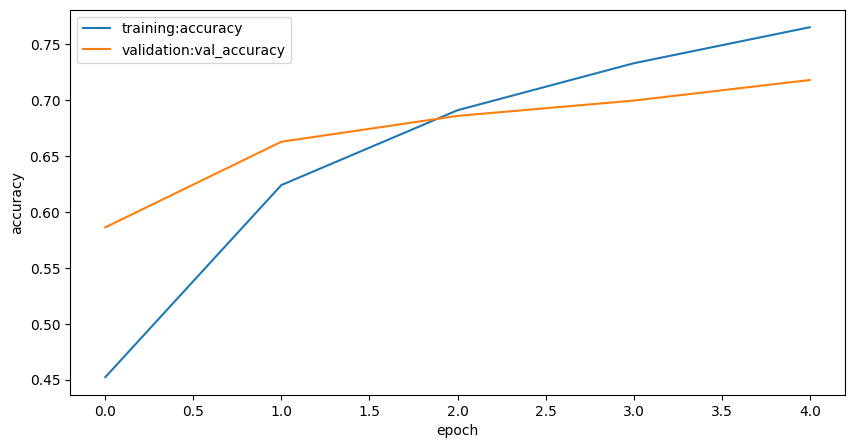

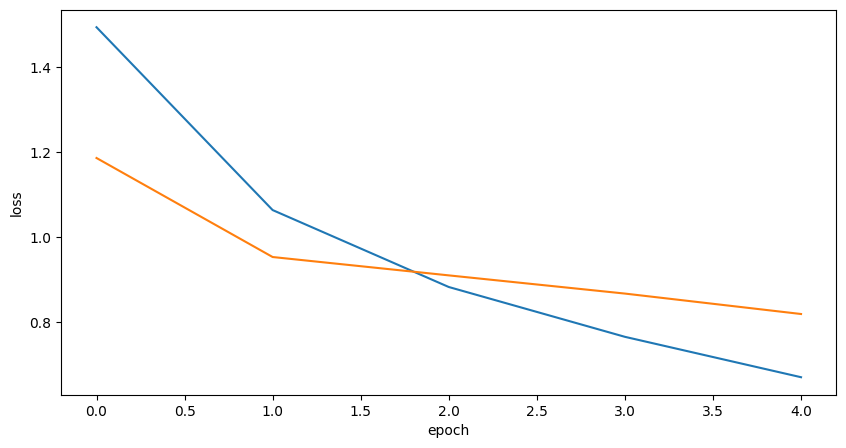

In [11]:
def plot_training_history(history,train_loss='loss',train_metric='accoracy',val_loss='val_loss',val_metric='val_accuracy'):
    #metric
    plt.figure(figsize=(10,5))
    plt.plot(history.history[train_metric],label=f"training:{train_metric}")
    plt.plot(history.history[val_metric],label=f"validation:{val_metric}")
    plt.xlabel("epoch")
    plt.ylabel(train_metric)
    plt.legend()
    plt.show()
    #loss
    plt.figure(figsize=(10,5))
    plt.plot(history.history[train_loss],label=f"training:{train_loss}")
    plt.plot(history.history[val_loss],label=f"validation:{val_loss}")
    plt.xlabel("epoch")
    plt.ylabel(train_loss)
plot_training_history(history,train_loss='loss',train_metric='accuracy',val_loss='val_loss',val_metric='val_accuracy')

In [12]:
val_loss,accuracy,auc=model.evaluate(val_ds,verbose=0)
print(f"val_loss: {val_loss}")
print(f"accuracy: {accuracy}")
print(f"auc: {auc}")



val_loss: 0.8197929859161377
accuracy: 0.7179999947547913
auc: 0.5158353447914124


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


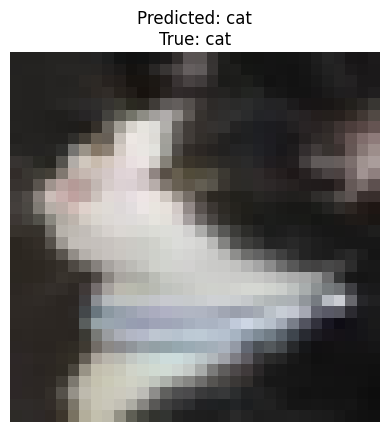

Confidence of prediction: 60.35


In [18]:
# prompt: observe code above and give me the code which test my model
# for example I will give random image from dataset and it will predict

# Select a random image from the validation set
random_index = np.random.randint(0, len(x_val))
test_image = x_val[random_index]
true_label = y_val[random_index]

# Reshape the image to match the expected input shape of the model
# The model expects a batch of images, so we add a batch dimension
test_image_input = np.expand_dims(test_image, axis=0)

# Predict the class of the image
predictions = model.predict(test_image_input)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Get the true class name
true_class_name = class_names[true_label[0]] # y_val is 2D, so we access the label with [0]

# Display the image and the prediction
plt.imshow(test_image)
plt.title(f"Predicted: {predicted_class_name}\nTrue: {true_class_name}")
plt.axis('off')
plt.show()

print(f"Confidence of prediction: {np.max(predictions)*100:.2f}")
